# Importing Libraries to be used

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick
%matplotlib inline

# Loading Data

In [2]:
df = pd.read_csv('Churn_Modelling.csv').drop('RowNumber', axis=1)
churn_df = df[df['Exited']==1]

In [3]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Making a new dataframe by taking some categorical values from the original dataframe

In [4]:
df_categ = df[['Geography', 'Gender', 'Exited', 'IsActiveMember']]
df_categ.head()

,Geography,Gender,Exited,IsActiveMember
0,France,Female,1,1
1,Spain,Female,0,1
2,France,Female,1,0
3,France,Female,0,0
4,Spain,Female,0,1


## Finding the ratio of 'Exited' /Churned in the total data

In [5]:
(df.Exited.value_counts()/len(df))*100

0    79.63
1    20.37
Name: Exited, dtype: float64

# Univariate Analysis

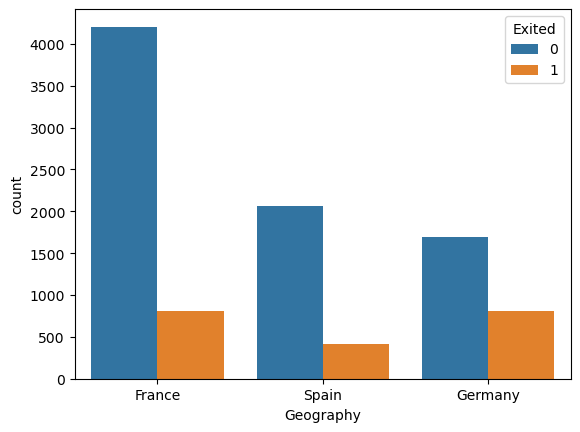

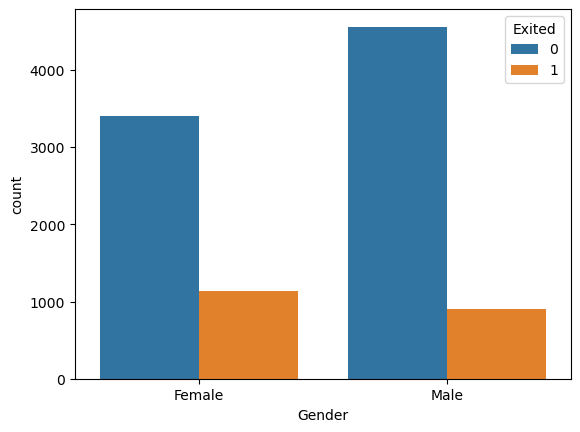

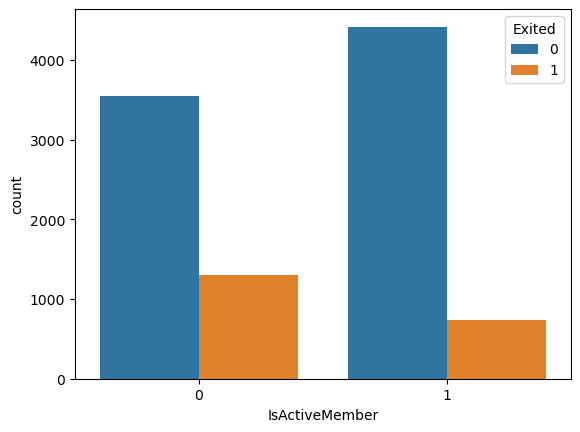

In [6]:
for i, predictor in enumerate(df_categ.drop(columns=['Exited'])):
    plt.figure()
    sns.countplot(data=df_categ, x=predictor, hue='Exited')

### Insights

#### Graph-1 : Geography
People in Germany are the most churners with churn-ratio(people churnde/total people) of around 33%, followed by France and Spain by 16% each.  

#### Graph-2 : Gender
Females churn more then men. Churn-ratio 24.6% while that of men is 16%.

#### Graph-3 : IsActiveMember
Member who are not active are more likely to churn. Churn-ratios: Inactive members: 25% Active members: 15%

# Bivariate Analysis

## Relation of Gender and Geography 

<AxesSubplot:xlabel='Gender', ylabel='Count'>

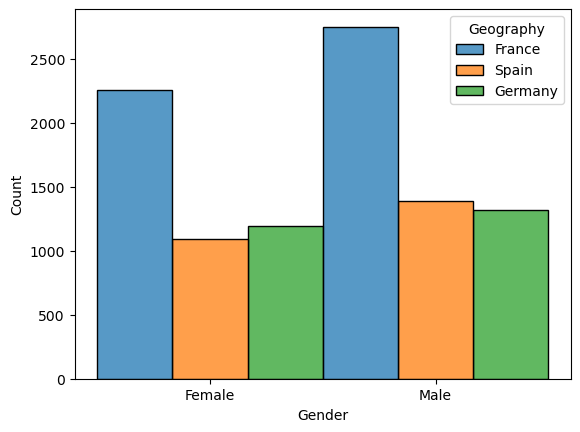

In [7]:
# Total Data
sns.histplot(x='Gender', hue='Geography', data=df, stat='count', multiple='dodge')

<AxesSubplot:xlabel='Gender', ylabel='Count'>

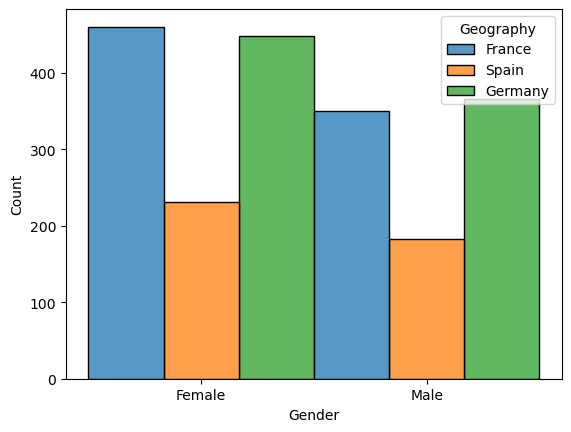

In [8]:
# Churn Data
sns.histplot(x='Gender', hue='Geography', data=churn_df, stat='count', multiple='dodge')

### Insights

#### France: 
Female churn-ratio: 21% , Male churn-ratio: 12%
#### Spain:
Female churn-ratio: 21% , Male churn-ratio: 12%
#### Germany:
Female churn-ratio: 38% , Male churn-ratio: 26%

#### Churn-ratio is high in both females and males of Germany

# Numerical Analysis

## Co-relation

In [9]:
df.corr()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.006248,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


<AxesSubplot:>

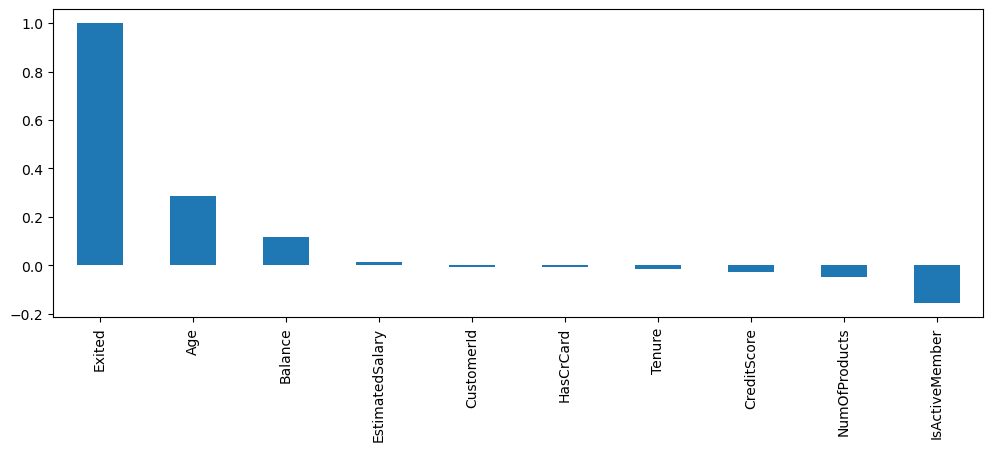

In [10]:
# corelation with respect to 'Exited'
plt.figure(figsize=(12, 4))
df.corr()['Exited'].sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:>

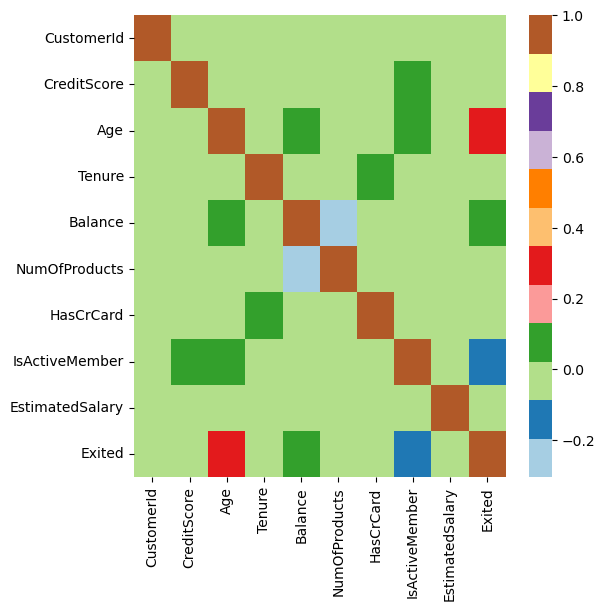

In [11]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(), cmap='Paired')

### Insights
* With respect to 'Exited', 'Age' is highly corelated while 'Balance' is also corelated.
* Similarly, 'IsActiveMember' is negatively corelated with 'Exited'.

## Age 

<AxesSubplot:>

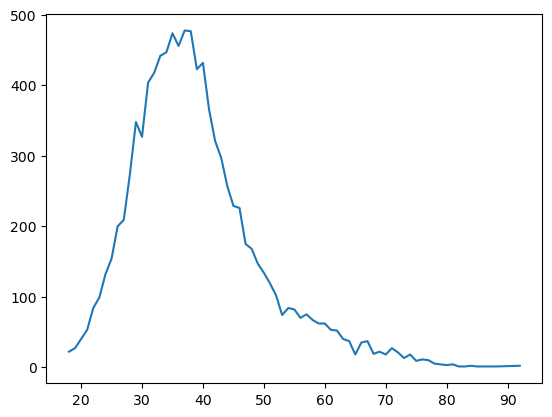

In [13]:
# Distribution of Age in data
df['Age'].value_counts().sort_index(ascending = True).plot()

<AxesSubplot:>

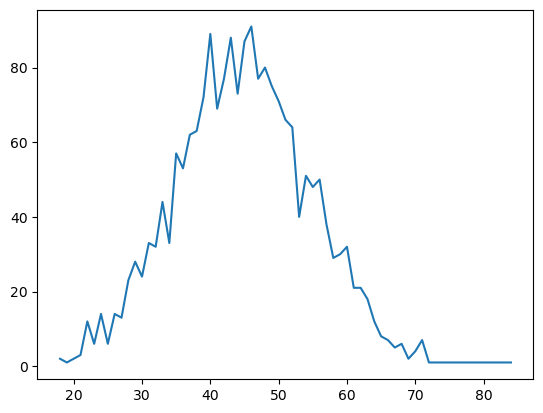

In [14]:
# Distribution of Age in churn data
churn_df['Age'].value_counts().sort_index(ascending = True).plot()

Text(0.5, 1.0, 'Churn by Age')

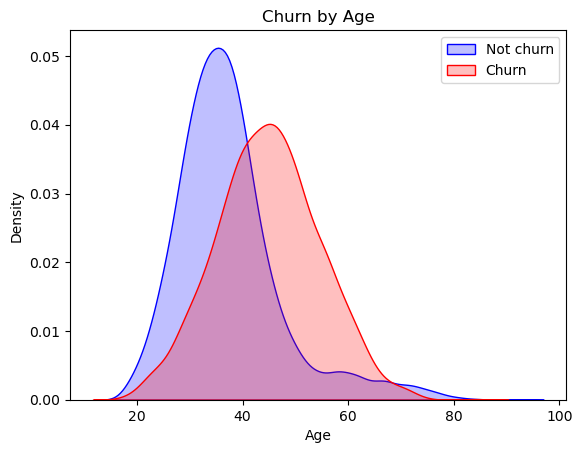

In [16]:
Tot = sns.kdeplot(df.Age[df['Exited']==0], color='Blue', shade=True)
Tot = sns.kdeplot(churn_df.Age, color='Red', shade=True)

Tot.legend(['Not churn', 'Churn'], loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Age')
Tot.set_title("Churn by Age")

### Insights
People who churn are more in age from 38 - 55

## Balance

Text(0.5, 1.0, 'Churn by Balance')

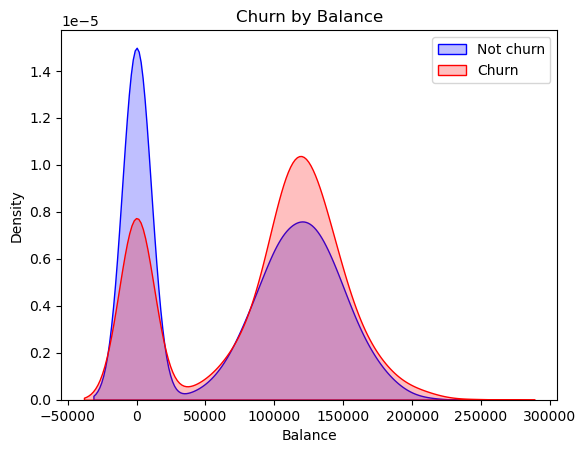

In [17]:
Tot = sns.kdeplot(df.Balance[df['Exited']==0], color='Blue', shade=True)
Tot = sns.kdeplot(churn_df.Balance, color='Red', shade=True)

Tot.legend(['Not churn', 'Churn'], loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Balance')
Tot.set_title("Churn by Balance")

### Insights
People with larger amount of 'Balance' (85,000 - 160,000) are more churners.However, people with lower balances are also churning but to a lesser extenet.